In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#The Three Irish Income Taxes are PAYE, PRSI and USC
def PAYE(grossIncome):
    taxDue = -3300 + 0.2*grossIncome
    if grossIncome>35300:
        taxDue += 0.2*(grossIncome-35300)
    if taxDue<0: taxDue = 0
    return taxDue

def PRSI(grossIncome):
    taxDue = 0
    weeklyIncome = grossIncome/52
    if weeklyIncome>352:
        credit = 12-(weeklyIncome-352)/6
        if credit<0: credit = 0
        taxDue = (weeklyIncome*0.04-credit)*52
    return taxDue

def USC(grossIncome):
    taxDue = 0
    if grossIncome < 12012:
        taxDue = grossIncome*0.005
    else:
        taxDue += 12012*0.005
    if (grossIncome > 12012 and grossIncome < 20687):
        taxDue += (grossIncome-12012)*0.02
    elif grossIncome > 12012:
            taxDue += (20687-12012)*0.02
    if (grossIncome > 20687):
        taxDue += (grossIncome-20687)*0.045
    return taxDue
        

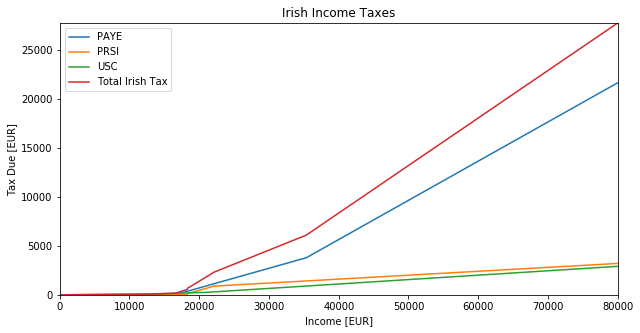

In [11]:
#Irish Income Tax Results

income = 80000 #in thousands
x = np.linspace(0, income, income+1)
t1 = [PAYE(el) for el in x]
t2 = [PRSI(el) for el in x]
t3 = [USC(el) for el in x]

zipped_lists = zip(t1, t2, t3)
irishTotal = [x+y+z for (x, y, z) in zipped_lists]


plt.figure(figsize=(10,5))
plt.plot(x, t1, label = "PAYE")
plt.plot(x, t2, label = "PRSI")
plt.plot(x, t3, label = "USC")
plt.plot(x, irishTotal, label = "Total Irish Tax")
plt.legend()
plt.xlim(0,income)
plt.ylim(0,irishTotal[-1])
plt.title("Irish Income Taxes")
plt.xlabel("Income [EUR]")
plt.ylabel("Tax Due [EUR]")

plt.show()

In [4]:
#The Two UK Income Taxes are "Income Tax" and "National Insurance"
def IncomeTax(grossIncome):
    taxDue = 0
    if grossIncome>12570:
        taxDue += 0.2*(grossIncome-12570)
    if grossIncome>=50270:
        taxDue += 0.2*(grossIncome-50270)
    if grossIncome>=150000:
        taxDue += 0.05*(grossIncome-150000)
    if grossIncome>100000 and grossIncome<125140:
        taxDue += 0.45*(grossIncome-100_000)
    if grossIncome>=125140:
        taxDue += 0.45*1250
    
    return taxDue

def NITax(grossIncome):
    taxDue = 0
    monthlyIncome = grossIncome/12
    if monthlyIncome>1048 and monthlyIncome<=4189:
        taxDue = 0.1325*(monthlyIncome-1048)*12
    if monthlyIncome>4189:
        taxDue = 0.1325*(4189-1048)*12
        taxDue += 0.0325*(monthlyIncome-4189)*12   
    return taxDue
        

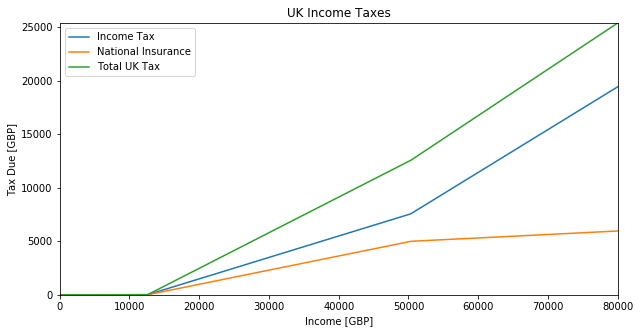

In [10]:
#UK Income Tax Results

income = 80000 # In GBP-
x = np.linspace(0, income, income+1)
t1 = [IncomeTax(el) for el in x]
t2 = [NITax(el) for el in x]


zipped_lists = zip(t1, t2)
UKTotal = [x+y for (x, y) in zipped_lists]

plt.figure(figsize=(10,5))
plt.plot(x, t1, label = "Income Tax")
plt.plot(x, t2, label = "National Insurance")
plt.plot(x, UKTotal, label = "Total UK Tax")

plt.legend()
plt.xlim(0,income)
plt.ylim(0,UKTotal[-1])
plt.title("UK Income Taxes")
plt.xlabel("Income [GBP]")
plt.ylabel("Tax Due [GBP]")

plt.show()

In [6]:
#To fairly compare the taxes on the same axis, we need to transpose the UK taxes[GBP] and values onto Irish [EUR] values.


GBP_income = 50000
GBP_to_Eur = 1.1625
Euro_equiv = int(GBP_income*GBP_to_Eur)
EUR_x = np.linspace(0, GBP_income, Euro_equiv+1)
GBP_x = np.linspace(0, Euro_equiv, Euro_equiv+1)

IT = [IncomeTax(el) for el in EUR_x]
NI = [NITax(el) for el in EUR_x]
CouncilTax = [180*12 for el in EUR_x]

zipped_lists = zip(IT, NI)
UK_Total = [x+y for (x, y) in zipped_lists]

zipped_lists = zip(IT, NI, CouncilTax)
UK_Total_plus_CT = [x+y+z for (x, y, z) in zipped_lists]


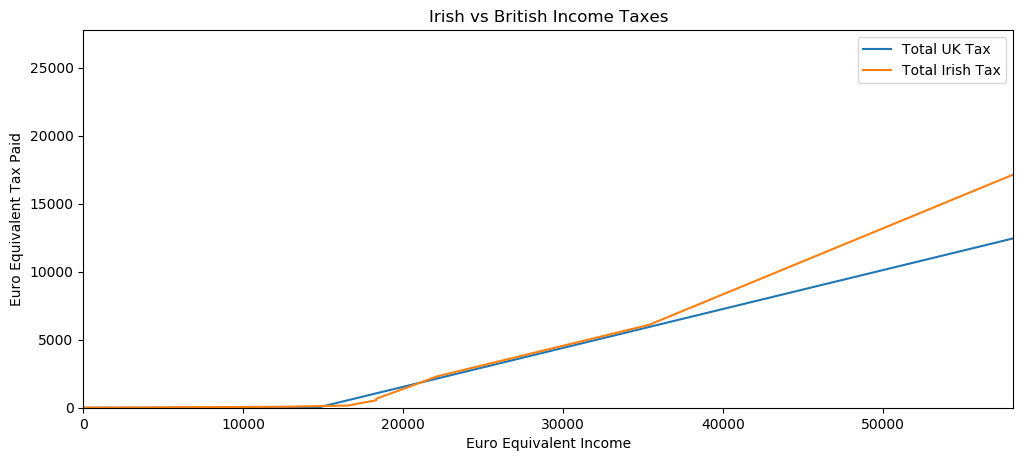

In [7]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(GBP_x, IT, label = "Income Tax")
#plt.plot(GBP_x, NI, label = "National Insurance")


#plt.plot(x, t1, label = "PAYE")
#plt.plot(x, t2, label = "PRSI")
#plt.plot(x, t3, label = "USC")



plt.plot(GBP_x, UK_Total, label = "Total UK Tax")
plt.plot(x, irishTotal, label = "Total Irish Tax")


plt.legend()
plt.xlim(0,Euro_equiv)
plt.ylim(0,irishTotal[-1])
plt.xlabel("Euro Equivalent Income")
plt.ylabel("Euro Equivalent Tax Paid")
plt.title("Irish vs British Income Taxes")
plt.show()


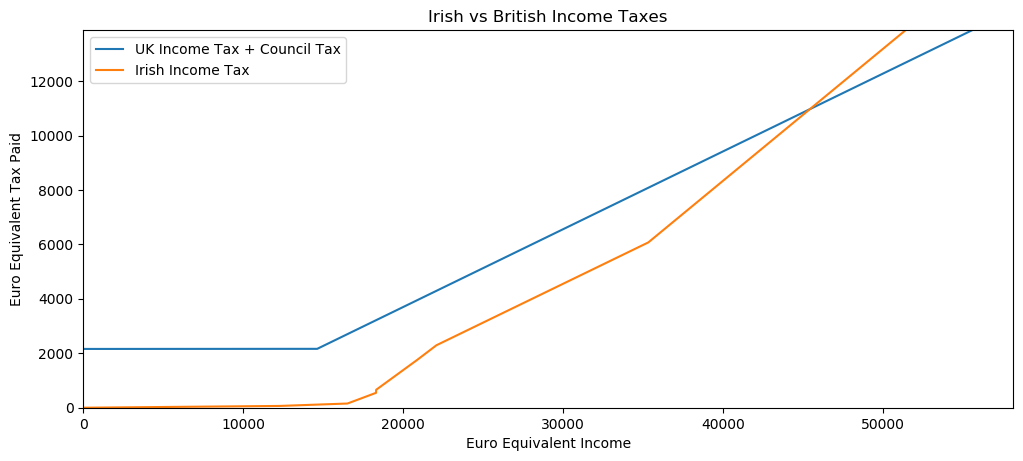

In [8]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(GBP_x, IT, label = "Income Tax")
#plt.plot(GBP_x, NI, label = "National Insurance")


#plt.plot(x, t1, label = "PAYE")
#plt.plot(x, t2, label = "PRSI")
#plt.plot(x, t3, label = "USC")


plt.plot(GBP_x, UK_Total_plus_CT, label = "UK Income Tax + Council Tax")
plt.plot(x, irishTotal, label = "Irish Income Tax")


plt.legend()
plt.xlim(0,Euro_equiv)
plt.ylim(0,irishTotal[-1]/2)
plt.xlabel("Euro Equivalent Income")
plt.ylabel("Euro Equivalent Tax Paid")
plt.title("Irish vs British Income Taxes")



plt.show()
#plt.savefig('Tax.png', figsize=(12,5), dpi=100)